# Homework 3: k-NN, measuring errors

DATA 202 - Fall 2019 - Calvin University

Based on Harvard-CS109a-FA18 lec4 prep

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

# New imports this time:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model


In [2]:
# This data file is downloaded from http://faculty.marshall.usc.edu/gareth-james/ISL/data.html
df_adv = pd.read_csv('data/Advertising.csv', index_col=0)

In [3]:
df_adv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [4]:
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
all_x_values = df_adv['TV'].values
all_y_values = df_adv['sales'].values

In [6]:
# sklearn predictors want to see 2d arrays,
# with each row being an observation
# and each column a predictor.
# Since we only grabbed out a single column,
# the array is just a 1d array.
all_x_values.shape

(200,)

In [7]:
# In NumPy there is a difference between a 1D array (like a vector) and a 2D array (like a matrix)
# To make a 1d array into a 2d array,
# we add a new "axis".
# Convince yourself why the new axis needs to be the second one.
all_x_values = all_x_values[:, np.newaxis]

# Now we have an array of observations by predictors.
all_x_values.shape

(200, 1)

# Nearest Neighbors on Small Subset

*Instructions*: Use observations 5 through 13. Fit a 1-NN model predicting the `sales` response from only the `TV` predictor. Plot both the data points and the mdel predictions.

In [30]:
data_x = all_x_values[5:13]
data_y = all_y_values[5:13]

# define the points where we're going to evaluate the model (asking it for predictions)
x = np.linspace(start=0, stop=300, num=500)
# Again we need to make this into a 2d array.
x = x[:, np.newaxis]
# here's what the first 10 rows look like. notice it's an array of arrays.
x[:10]

array([[0.        ],
       [0.6012024 ],
       [1.20240481],
       [1.80360721],
       [2.40480962],
       [3.00601202],
       [3.60721443],
       [4.20841683],
       [4.80961924],
       [5.41082164]])

Text(0, 0.5, 'Sales ($1k)')

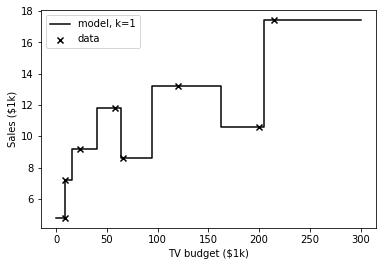

In [22]:
# Warm-up: plot 1-NN
n_neighbors = 1
plt.scatter(data_x, data_y, color='black', marker='x', label='data')

knn = KNeighborsRegressor(n_neighbors)
knn.fit(data_x, data_y)
y_hat = knn.predict(x)

plt.plot(x, y_hat, label=f"model, k={n_neighbors}", color='black', drawstyle="steps-mid")
plt.legend()
plt.xlabel("TV budget ($1k)")
plt.ylabel("Sales ($1k)");

Now plot k=1 and k=5 side by side.

In [23]:
# 'zip' puts two or more sequences together into one:
for a, b in zip([1, 2, 3], 'abc'):
    print(a, b)

1 a
2 b
3 c


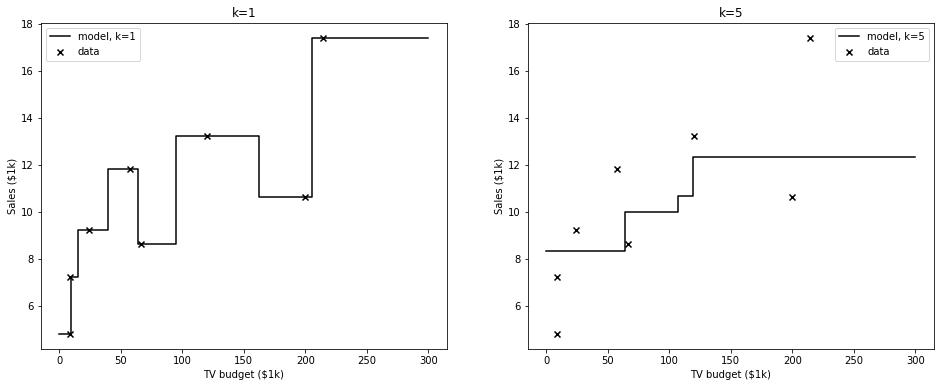

In [24]:
# make two plots side by side.
# axs[0] is the left plot "axes", axs[1] is the right one
fig, axs = plt.subplots(ncols=2, figsize=(16, 6))

for ax, n_neighbors in zip(axs, [1, 5]):
    # for the most part, "axes" have the same methods as "plt".
    ax.scatter(data_x, data_y, color='black', marker='x', label='data')

    knn = KNeighborsRegressor(n_neighbors)
    knn.fit(data_x, data_y)
    y_hat = knn.predict(x)

    ax.plot(x, y_hat, label=f"model, k={n_neighbors}", color='black', drawstyle="steps-mid")
    ax.legend()
    
    # Notice these labeling commands are slightly different.
    ax.set_xlabel("TV budget ($1k)")
    ax.set_ylabel("Sales ($1k)")
    ax.set_title(f"k={n_neighbors}")


# Larger Dataset

*Instructions*: Make the same plots as above, but using the first 100 observations, and k=1, 10, and 100.

In [31]:
data_x = all_x_values[:100]
data_y = all_y_values[:100]

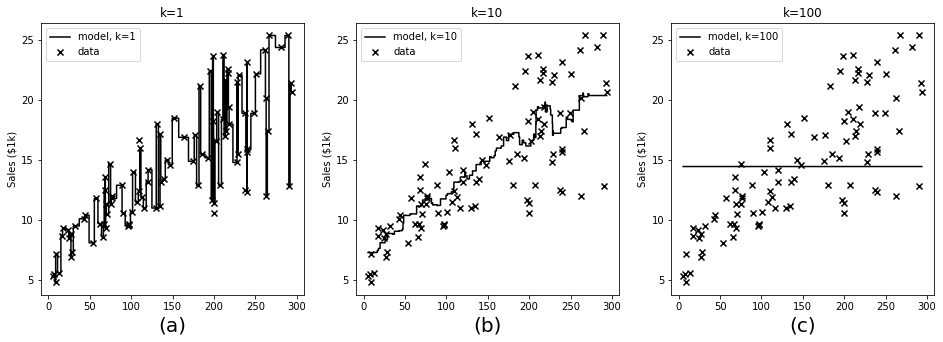

In [32]:
x = np.linspace(np.min(data_x), np.max(data_x), 1000)[:, None]

fig, axs = plt.subplots(ncols=3, figsize=(16, 5))

for ax, n_neighbors, label in zip(axs, [1, 10, 100], 'abc'):
    ax.scatter(data_x, data_y, color='black', marker='x', label='data')

    knn = KNeighborsRegressor(n_neighbors)
    knn.fit(data_x, data_y)
    y_hat = knn.predict(x)

    ax.plot(x, y_hat, label=f"model, k={n_neighbors}", color='black', drawstyle="steps-mid")
    ax.legend()
    
    # Notice these labeling commands are slightly different.
    ax.set_xlabel("TV budget ($1k)")
    ax.set_ylabel("Sales ($1k)")
    ax.set_title(f"k={n_neighbors}")
    ax.set_xlabel(f'({label})', fontsize=20)


(does the above look familiar?)

# Evaluate error on test set

Evaluate and plot the MSE on the training set for k=(1, 2, 3, 4, 5).

In [41]:
train_x = all_x_values[:100]
train_y = all_y_values[:100]

n_neighbors_vals = [1, 2, 3, 4, 5, 6]
training_mses = []
for n_neighbors in n_neighbors_vals:
    # Train the model on the training set.
    knn = KNeighborsRegressor(n_neighbors)
    knn.fit(train_x, train_y)
    
    # Evaluate the model on the training set.
    y_hat = knn.predict(train_x) # note that this isn't the 'x' we got from linspace above. Why?
    residuals = train_y - y_hat
    mse = np.mean(residuals ** 2)
    training_mses.append(mse)

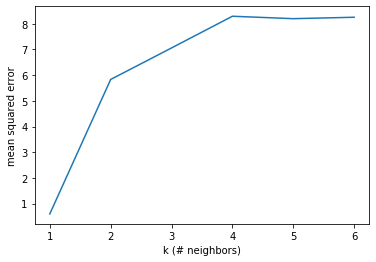

In [45]:
plt.plot(n_neighbors_vals, training_mses, label="Training Set")
plt.xlabel("k (# neighbors)")
plt.ylabel("mean squared error");

Use the other 100 observations as a test set. Evaluate the MSE on the test set, for the same k values. Plot both the training and test error.

In [42]:
test_x = all_x_values[100:]
test_y = all_y_values[100:]

test_mses = []
for n_neighbors in n_neighbors_vals:
    # Train the model on the training set.
    knn = KNeighborsRegressor(n_neighbors)
    knn.fit(train_x, train_y)
    
    # Evaluate the model on the TEST set.
    y_hat = knn.predict(test_x) # note that this isn't 'x'. Why?
    residuals = test_y - y_hat
    mse = np.mean(residuals ** 2)
    test_mses.append(mse)

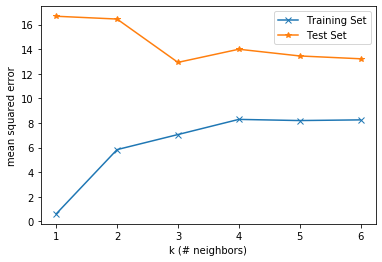

In [48]:
plt.plot(n_neighbors_vals, training_mses, marker='x', label="Training Set")
plt.plot(n_neighbors_vals, test_mses, marker='*', label="Test Set")
plt.xlabel("k (# neighbors)")
plt.ylabel("mean squared error");
plt.legend();

We notice that:

* The training set error is lower than the test set error (but it doesn't actually reach 0... why?)
* As k increases, the training set error increases.
* As k increases, the test set error generally decreases (but there's still some variance, and maybe it starts to plateau above 5, but we'd need to plot more to be sure).
* This makes sense because ____